In [59]:
import numpy as np
import pandas as pd 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale= 1.2)
%matplotlib inline


In [6]:
recipes = pd.read_csv('muffin_cupcakes.csv')

In [8]:
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


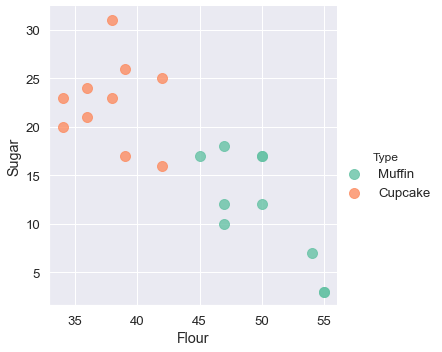

In [39]:
sns.lmplot("Flour","Sugar",data=recipes, hue="Type", palette="Set2",
          fit_reg=False, scatter_kws={'s':100})

# This lets us see how cupcakes use way more sugar and less flour than muffins

In [22]:
# Change categorical values to numerical

# This will helps us know if it's a muffin or not
types = np.where(recipes["Type"]=="Muffin",0,1)

# Take all the columns except from the first one and convert them to a list
recipe_features = recipes.columns.values[1:].tolist()


In [23]:
# check if we got everything but the type column

recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [25]:
# Get an array of the two columns we'll use

ingredients = recipes[["Flour","Sugar"]].values

ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [26]:
# Fit model: SVC C-support Vector Classification and SVM Suport Vector Machine
# Linear Kernel is used when the data is Linearly separable (can be separated using a single Line).

cm_model = svm.SVC(kernel='linear')

# very simple example of split test & train data

cm_model.fit(ingredients,types)

SVC(kernel='linear')

## Visualizing the the hyperplane 
Is like a line between the support vectors (closest neighbours from each class: muffin and cupcake)

In [35]:
# coef_ is the coefficients for the prediction of each of the targets. It is also the same as if you trained a model to predict each of the targets separately.
w = cm_model.coef_[0]

# the slope that we are generating
slope = -w[0] / w[1]

# Create a numpy array which is just a line of values between 30 and 60 
xx = np.linspace(30,60)

# Based on the formula y = mx + i ( the "slope" times "x" + the "intercept" )
yy = slope * xx - (cm_model.intercept_[0] / w[1])

print(xx, '\n')

print(yy)


[30.         30.6122449  31.2244898  31.83673469 32.44897959 33.06122449
 33.67346939 34.28571429 34.89795918 35.51020408 36.12244898 36.73469388
 37.34693878 37.95918367 38.57142857 39.18367347 39.79591837 40.40816327
 41.02040816 41.63265306 42.24489796 42.85714286 43.46938776 44.08163265
 44.69387755 45.30612245 45.91836735 46.53061224 47.14285714 47.75510204
 48.36734694 48.97959184 49.59183673 50.20408163 50.81632653 51.42857143
 52.04081633 52.65306122 53.26530612 53.87755102 54.48979592 55.10204082
 55.71428571 56.32653061 56.93877551 57.55102041 58.16326531 58.7755102
 59.3877551  60.        ] 

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14

## Create the two lines that passes through the support vectors 
One line for each class: muffin and cupcake

In [38]:
b = cm_model.support_vectors_[0]

yy_down = slope * xx + (b[1] - slope * b[0])

b = cm_model.support_vectors_[-1]

xx_up = slope * xx + (b[1] - slope * b[0])


print(yy_down, '\n')
print(xx_up)

[ 1.28642688e+16  1.23391966e+16  1.18141244e+16  1.12890522e+16
  1.07639800e+16  1.02389078e+16  9.71383564e+15  9.18876344e+15
  8.66369124e+15  8.13861905e+15  7.61354685e+15  7.08847465e+15
  6.56340246e+15  6.03833026e+15  5.51325806e+15  4.98818587e+15
  4.46311367e+15  3.93804147e+15  3.41296928e+15  2.88789708e+15
  2.36282488e+15  1.83775269e+15  1.31268049e+15  7.87608295e+14
  2.62536098e+14 -2.62536098e+14 -7.87608295e+14 -1.31268049e+15
 -1.83775269e+15 -2.36282488e+15 -2.88789708e+15 -3.41296928e+15
 -3.93804147e+15 -4.46311367e+15 -4.98818587e+15 -5.51325806e+15
 -6.03833026e+15 -6.56340246e+15 -7.08847465e+15 -7.61354685e+15
 -8.13861905e+15 -8.66369124e+15 -9.18876344e+15 -9.71383564e+15
 -1.02389078e+16 -1.07639800e+16 -1.12890522e+16 -1.18141244e+16
 -1.23391966e+16 -1.28642688e+16] 

[ 1.02914151e+16  9.76634286e+15  9.24127066e+15  8.71619846e+15
  8.19112627e+15  7.66605407e+15  7.14098187e+15  6.61590968e+15
  6.09083748e+15  5.56576528e+15  5.04069309e+15  4.51

## Plot the hyperplane and the parallels ( lines for the nearest support vectors)

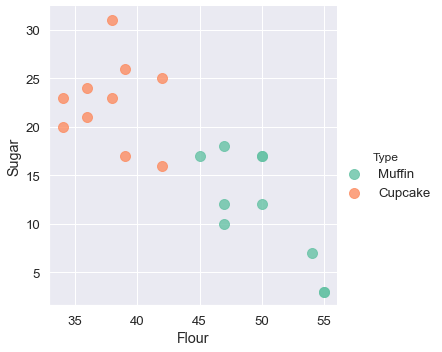

In [44]:
# This is the first plot we did earlier to see all the data points 

sns.lmplot ('Flour','Sugar', data=recipes, hue='Type', palette='Set2',
            fit_reg=False, scatter_kws={'s':100}) 



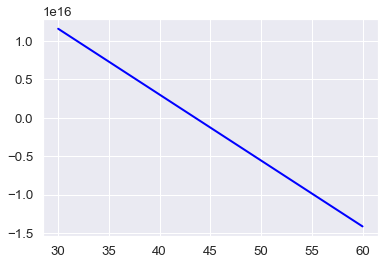

In [45]:
# Plot the line that separates the two classes

plt.plot(xx,yy, linewidth=2, color="blue")


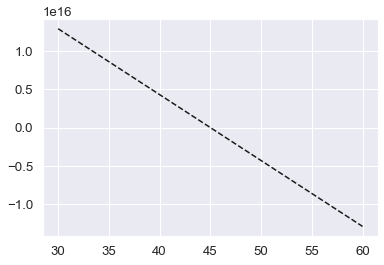

In [46]:
# Plot the upper line that passes throw the nearest support vector

plt.plot(xx,yy_down, 'k--') # k-- is to have a dot line

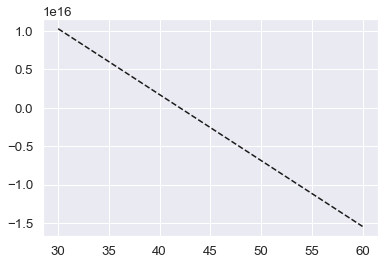

In [47]:
# Plot the bottom line that passes throw the nearest support vectors

plt.plot(xx,yy_up, 'k--') 

# Final result

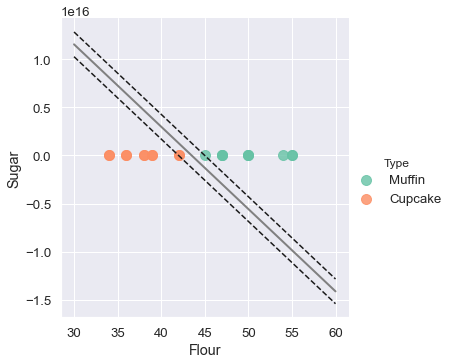

In [49]:
sns.lmplot ('Flour','Sugar', data=recipes, hue='Type', palette='Set2',
            fit_reg=False, scatter_kws={'s':100}) 
plt.plot(xx,yy, linewidth=2, color="gray")
plt.plot(xx,yy_down, 'k--')
plt.plot(xx,yy_up, 'k--') 

# Create a function to predict if it's a cupkace or muffin based on flour and sugar compostion.

In [50]:
def muf_or_cup(flour,sugar):
    if( cm_model.predict([[flour,sugar]])) ==0: # earlier we said that 0 = muffin
        print('It is a muffin muffin 🍞')
    else:
        print('It is a cupcake 🧁')

In [56]:
muf_or_cup(20,40)

It is a cupcake 🧁


# In case we want to see this prediction on the plane

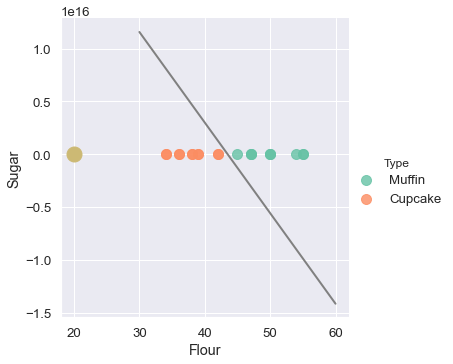

In [58]:
sns.lmplot ('Flour','Sugar', data=recipes, hue='Type', palette='Set2',
            fit_reg=False, scatter_kws={'s':100}) # all the data points
plt.plot(xx,yy, linewidth=2, color="gray") # the line that divides the two classes
plt.plot(20,40,"yo", markersize='15') # our prediction data point in yellow

In [ ]:
# reference : Siplilearn https://www.youtube.com/watch?v=DWsJc1xnOZo